# Timesfm Usage Example

## Loading Timesfm Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import TimesfmModel
from tsfmproject.dataset import TimesfmDataset
from tsfmproject.utils import load_args

arg_path = "../config/timesfm.json"
args = load_args(arg_path)
tfm = TimesfmModel(**args)


Using device: cuda:1


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

## Define the datasets

In [2]:
train_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', normalize=False,
                              mode='train', context_len=args["config"]["context_len"], horizon_len=args["config"]["horizon_len"])
val_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', normalize=False, 
                              mode='test', context_len=args["config"]["context_len"], horizon_len=args["config"]["horizon_len"])

## Evaluate the zero-shot forecasting

In [3]:
metrics = tfm.evaluate(val_dataset)
print(metrics)

trues shape (27, 7, 128)
quantiles shape (3456, 7, 10)
{'mse': 13.358897, 'mae': 1.9295309, 'mase': 0.59743387, 'mape': 893.51276, 'rmse': 3.6549826, 'nrmse': 0.07959628634970796, 'smape': 0.4764167, 'msis': 0.060095385, 'nd': 0.5367535125133984}


## Visualization of the evaluation

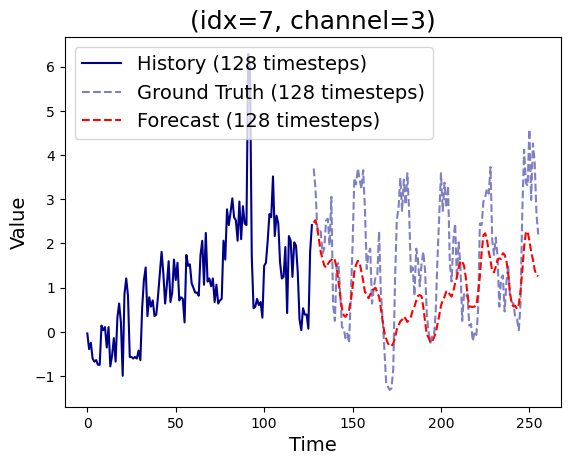

In [4]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (128 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (64 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (64 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()
tfm.plot(val_dataset)

## Finetune Timesfm Model on the ETT dataset

In [5]:
finetuned_model = tfm.finetune(train_dataset)

Epoch 0, Loss: 3.24748791547922
Epoch 1, Loss: 3.1101642702317096
Epoch 2, Loss: 3.0407634787900264
Epoch 3, Loss: 2.9145970249988227
Epoch 4, Loss: 2.8815332191186345
Epoch 5, Loss: 2.8755390692016976
Epoch 6, Loss: 2.787619158011616
Epoch 7, Loss: 2.726983936694676
Epoch 8, Loss: 2.6460624277907674
Epoch 9, Loss: 2.629601684809217


## Test the Finetuned Model

In [6]:
avg_loss, trues, preds, histories = tfm.evaluate(val_dataset)
print("Validation loss:", avg_loss)

Validation loss: 0.41851604012427507


## Visualization of the evaluation

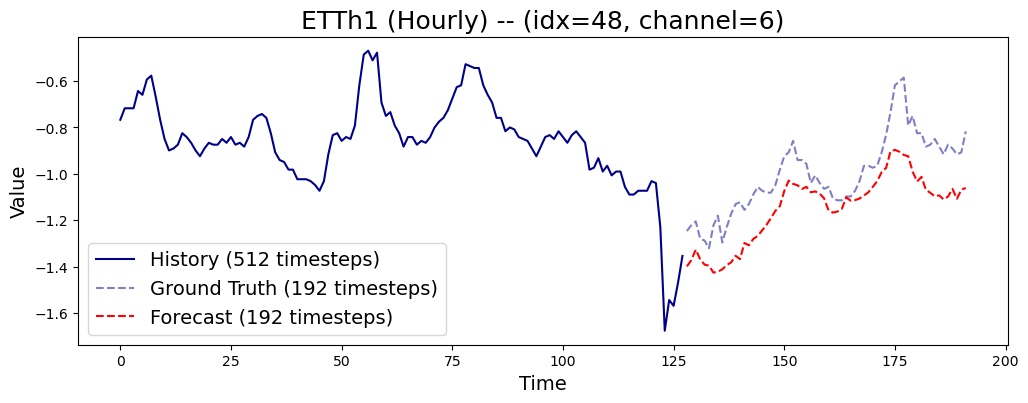

In [7]:
import matplotlib.pyplot as plt

# Pick a random channel and time index
trues = np.array(trues)
preds = np.array(preds)
histories = np.array(histories)
channel_idx = np.random.randint(0, trues.shape[1]) 
time_index = np.random.randint(0, trues.shape[0]) 

history = histories[time_index, channel_idx, :] 
true = trues[time_index, channel_idx, :]
pred = preds[time_index, channel_idx, :]

plt.figure(figsize=(12, 4))

# Plotting the first time series from history
plt.plot(range(len(history)), history, label='History (512 timesteps)', c='darkblue')

# Plotting ground truth and prediction
num_forecasts = len(true)

offset = len(history)
plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (192 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (192 timesteps)', color='red', linestyle='--')

plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=14)
plt.show()